# Prediction

In [5]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


Accuracy: 71.33%
Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.50      0.58      2840
           0       0.00      0.00      0.00      1785
           1       0.72      0.95      0.82      7957

    accuracy                           0.71     12582
   macro avg       0.47      0.48      0.47     12582
weighted avg       0.61      0.71      0.65     12582



C:\Users\farah\anaconda\envs\faconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\farah\anaconda\envs\faconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\farah\anaconda\envs\faconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


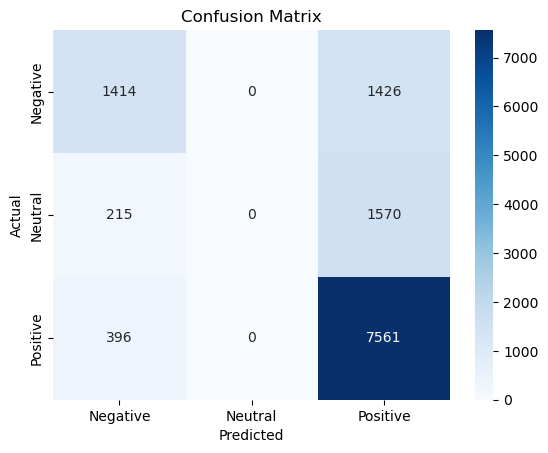

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load Dataset
df = pd.read_csv('data_pp_lda_sentiment.csv')

# Step 2: Encode Categorical Variables
label_encoder = LabelEncoder()
df['brand_name_encoded'] = label_encoder.fit_transform(df['brand_name'])

# Step 3: Select Features and Target
X = df[['Rating', 'brand_name_encoded']].values  # Ensure only numeric features
y = df['relative sentiments'].map({'positive': 1, 'neutral': 0, 'negative': -1}).values  # Encode target

# Step 4: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Feature Scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train Naïve Bayes Model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = classifier.predict(X_test)

# Accuracy and Classification Report
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Load the saved model and vectorizer
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

# Predict sentiment for new reviews
#new_reviews = ["This car is amazing with great performance!", "The car had too many issues and was unreliable."]
#new_reviews = ["car is bad ","The car has average features and is okay for its price", "car is good"]
new_reviews = ["My 2023 Alpina B8, is hands down the best car I have ever owned. 5 stars doesn't do it justice from the exterior to the interior, from the front bumper to the rear spoiler, from the moon-sunroof to the underside, all perfection", "The car has average features and is okay for its price", "Trunk gaskets wrong design, leaking rain water inside, Car goes toasted."]
new_reviews_vectorized = loaded_vectorizer.transform(new_reviews)
predicted_sentiments = loaded_model.predict(new_reviews_vectorized)

print(predicted_sentiments)
